# Google Play Store App Analysis

## 1.0 Summary

## 2.0 Background

Mobile apps have become a normal part of everyday and everyone with a smartphone
has used and downloaded mobile apps to their device. Many of these apps on various
marketplace are accompanied by user reviews. This analysis will focus on Android apps on the Google Play Store marketplace. In addition to analyzing apps across various app categories it will also utilize user review to gather qualitative insights about these apps. The dataset used for this analysis was published ot [Kaggle](https://www.kaggle.com/datasets), and can be found here: [Google Play Store Apps](https://www.kaggle.com/datasets/lava18/google-play-store-apps).

## 3.0 Environment Setup

### 3.1 Package Import

In [104]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## 4.0 Data Import

### 4.1 Apps

### 4.1.1 App Description
Dataset which contains the details of the Google Play Store apps and provides 13
feature describing the application.

*All features represent the feature at the time the dataset was created and may have changed since*

* App: Application name
* Category: category of the app
* Rating: overall user rating of the app
* Reviews: number of user reviews
* Size: size of the app
* Installs: number of user downloads of the app
* Type: paid or free
* Price: price of the app
* Content Rating: age group the app is targeted at (Children/Mature 21+/Adult)
* Genres: the app can belong to multiple genres (in addition to the main category)
* Last Updated: date the app wa last updated on the marketplace
* Current Ver: current version of the app available on the marketplace
* Android Ver: minimum required android version


In [105]:
raw_apps = pd.read_csv("datasets/apps.csv")
raw_apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 4.1.2 User Reviews
Dataset contain 100 reviews for each app, with the most helpful reviews listed first. The text has been pre-process through a sentiment analyzer and tagged with its sentiment score

In [106]:
raw_reviews = pd.read_csv("datasets/user_reviews.csv")
raw_reviews.head()

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 5.0 Exploratory Analysis

### 5.1 Duplicate Apps

In [107]:
raw_apps.nunique()

Unnamed: 0        9659
App               9659
Category            33
Rating              39
Reviews           5330
Size               191
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2769
Android Ver         33
dtype: int64

The App column containing the application name all are unique values indicating
that there are no duplicated apps in the dataset. There are 33 unique main
categories an app can belong to. Reviewing the unique values of Installs, which
was expected to be a number, this does not appear to be the case. Looking at the
data it looks like the number of installs have been binned to categorical
grouping (e.g. 10,000+, 50,000+)

### 5.2 Data Types

In [108]:
raw_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


Reviewing the data types of each column it can be seen that Installs is an object type. Prior to analysis this will have to be modified and transformed to an integer data type.

### 5.3 Category Counts

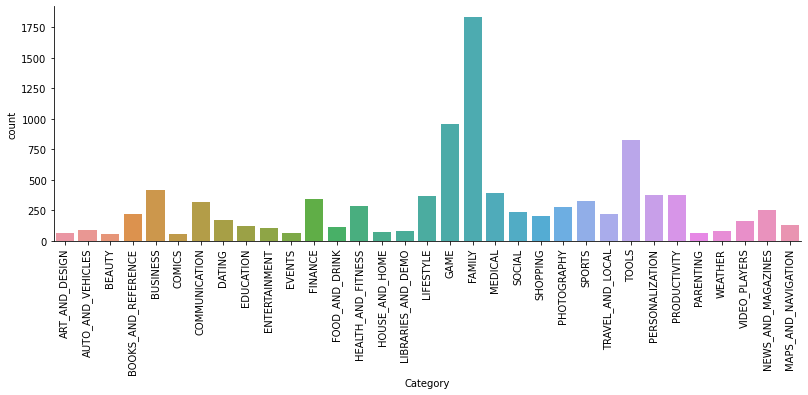

In [109]:
plot = sns.catplot(x='Category', data=raw_apps, kind='count', height=4, aspect=3)
plot.set_xticklabels(rotation='vertical')

The category with the most apps in the dataset is the FAMILY category with 1832 apps, followed by GAME and then TOOLS with 959 and 827, respectively.

### 5.4 Rating Distribution

4.173243045387994

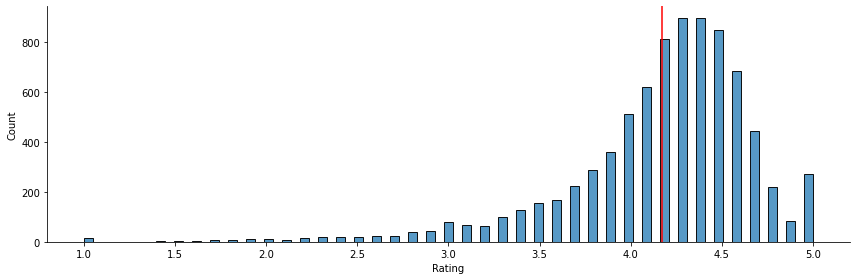

In [110]:
plot = sns.displot(x='Rating', data=raw_apps, height=4, aspect=3)
plt.axvline(x=raw_apps.Rating.mean(), color='red')
raw_apps.Rating.mean()

The average rating across all app categories can be seen to b approximately 4.2. The histogram is skewed to the left which indicates the majority of the apps are highly rated with a few number of lowly rated apps.

### 5.5 Price Counts

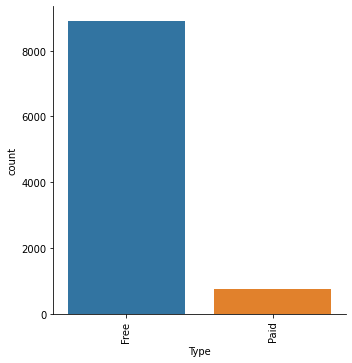

In [111]:
plot = sns.catplot(x='Type', data=raw_apps, kind='count')
plot.set_xticklabels(rotation='vertical')

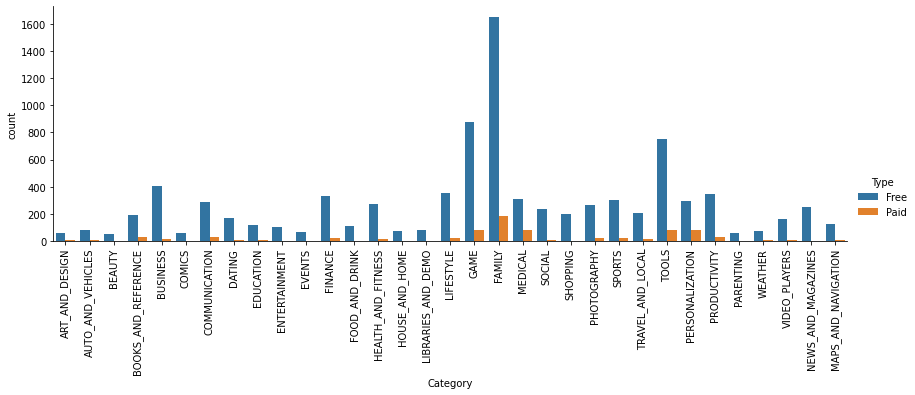

In [112]:
plot = sns.catplot(x='Category', data=raw_apps, kind='count', height=4, aspect=3, hue='Type')
plot.set_xticklabels(rotation='vertical')

The most popular type of app analyzed is Free consisting of 8903 of the 9659 apps in the data, or 92%. The breakdown of Free vs Paid appears to be roughly consistent across all the app categories.

## 6.0 Cleaning Datasets 

### 6.1 Drop Erroneous Column

In [120]:
apps = raw_apps.drop('Unnamed: 0', axis='columns')

### 6.2 Correct Data Types

Both the Installs columns and Price column contain characters `,`, `+`, and '$` that prohibit transforming the column to a numeric data type which will be needed for analysis. These characters must be dropped from the values and then the data type will be updated.

In [121]:
characters = ['+', ',', '$']
columns = ['Installs', 'Price']

# Iterate over each column to be cleaned
for col in columns:
    #Ierate over each character to be replaced
    for char in characters:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

    apps[col] = apps[col].astype(float)

apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 981.1+ KB


## 7.0 Data Analysis

###### *May 2022 Release 1.0*